In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Load your CSV data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [7]:
# Extract the feature columns and normalize the data to be between 0 and 1
x_train = df_train.iloc[:, 0:].values.astype('float32') / 255.
x_test = df_test.iloc[:, 0:].values.astype('float32') / 255.

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the data to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the input shape
input_shape = x_train.shape[1:]

Epoch 1/50
2/2 [==============================] - 1s 145ms/step - loss: 0.6918 - val_loss: 0.6835
Epoch 2/50
2/2 [==============================] - 0s 35ms/step - loss: 0.6808 - val_loss: 0.6684
Epoch 3/50
2/2 [==============================] - 0s 29ms/step - loss: 0.6636 - val_loss: 0.6432
Epoch 4/50
2/2 [==============================] - 0s 30ms/step - loss: 0.6357 - val_loss: 0.6042
Epoch 5/50
2/2 [==============================] - 0s 28ms/step - loss: 0.5932 - val_loss: 0.5475
Epoch 6/50
2/2 [==============================] - 0s 31ms/step - loss: 0.5327 - val_loss: 0.4702
Epoch 7/50
2/2 [==============================] - 0s 34ms/step - loss: 0.4521 - val_loss: 0.3735
Epoch 8/50
2/2 [==============================] - 0s 30ms/step - loss: 0.3530 - val_loss: 0.2658
Epoch 9/50
2/2 [==============================] - 0s 31ms/step - loss: 0.2459 - val_loss: 0.1631
Epoch 10/50
2/2 [==============================] - 0s 32ms/step - loss: 0.1469 - val_loss: 0.0830
Epoch 11/50
2/2 [===========

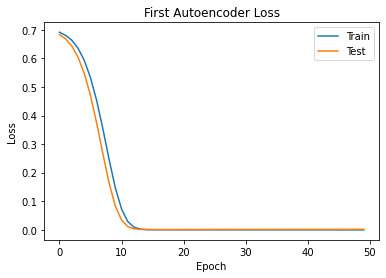

In [8]:
# Define the encoder layers for the first autoencoder
input_layer = Input(shape=input_shape)
encoded1 = Dense(128, activation='relu')(input_layer)
encoded2 = Dense(64, activation='relu')(encoded1)
encoded3 = Dense(32, activation='relu')(encoded2)

# Define the decoder layers for the first autoencoder
decoded1 = Dense(64, activation='relu')(encoded3)
decoded2 = Dense(128, activation='relu')(decoded1)
decoded3 = Dense(input_shape[0], activation='sigmoid')(decoded2)

# Define the first autoencoder model
autoencoder1 = Model(input_layer, decoded3)

# Compile the first autoencoder model
autoencoder1.compile(optimizer='adam', loss='binary_crossentropy')

# Train the first autoencoder model
history1 = autoencoder1.fit(x_train_noisy, x_train, epochs=50, batch_size=128, validation_data=(x_test_noisy, x_test))

# Plot the loss curve for the first autoencoder
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('First Autoencoder Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Epoch 1/50
2/2 [==============================] - 1s 168ms/step - loss: 0.6933 - val_loss: 0.6881
Epoch 2/50
2/2 [==============================] - 0s 32ms/step - loss: 0.6871 - val_loss: 0.6823
Epoch 3/50
2/2 [==============================] - 0s 34ms/step - loss: 0.6812 - val_loss: 0.6753
Epoch 4/50
2/2 [==============================] - 0s 29ms/step - loss: 0.6737 - val_loss: 0.6660
Epoch 5/50
2/2 [==============================] - 0s 60ms/step - loss: 0.6640 - val_loss: 0.6540
Epoch 6/50
2/2 [==============================] - 0s 38ms/step - loss: 0.6513 - val_loss: 0.6387
Epoch 7/50
2/2 [==============================] - 0s 41ms/step - loss: 0.6355 - val_loss: 0.6199
Epoch 8/50
2/2 [==============================] - 0s 43ms/step - loss: 0.6160 - val_loss: 0.5978
Epoch 9/50
2/2 [==============================] - 0s 28ms/step - loss: 0.5933 - val_loss: 0.5732
Epoch 10/50
2/2 [==============================] - 0s 28ms/step - loss: 0.5686 - val_loss: 0.5484
Epoch 11/50
2/2 [===========

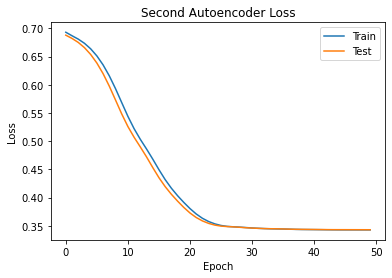

In [5]:
# Extract features using the encoder from the first autoencoder
encoder1 = Model(input_layer, encoded3)
encoded_train1 = encoder1.predict(x_train)
encoded_test1 = encoder1.predict(x_test)

# Define the encoder layers for the second autoencoder
input_layer2 = Input(shape=(32,))
encoded4 = Dense(64, activation='relu')(input_layer2)
encoded5 = Dense(128, activation='relu')(encoded4)
encoded6 = Dense(64, activation='relu')(encoded5)

# Define the decoder layers for the second autoencoder
decoded4 = Dense(128, activation='relu')(encoded6)
decoded5 = Dense(64, activation='relu')(decoded4)
decoded6 = Dense(32, activation='sigmoid')(decoded5)

# Define the second autoencoder model
autoencoder2 = Model(input_layer2, decoded6)

# Compile thesecond autoencoder model

autoencoder2.compile(optimizer='adam', loss='binary_crossentropy')

#Train the second autoencoder model

history2 = autoencoder2.fit(encoded_train1, encoded_train1, epochs=50, batch_size=128, validation_data=(encoded_test1, encoded_test1))

#Plot the loss curve for the second autoencoder

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Second Autoencoder Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [6]:
#Extract features using the encoder from the second autoencoder
encoder2 = Model(input_layer2, encoded6)
encoded_train2 = encoder2.predict(encoded_train1)
encoded_test2 = encoder2.predict(encoded_test1)

In [7]:
#Save the extracted features to CSV files
np.savetxt("encoded_train2.csv", encoded_train2, delimiter=",")
np.savetxt("encoded_test2.csv", encoded_test2, delimiter=",")

In [11]:
c = np.vstack((encoded_train2,encoded_test2))

In [13]:
import pandas as pd
df_SDAE = pd.DataFrame(c)

In [15]:
df_SDAE.to_csv("file5" + ".csv", index=0, sep=',')